# Bike Sharing Assignment

### Business Goal:

- We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Importing required libraries and warnings

In [16]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

## Reading and understanding data

In [18]:
dfb=pd.read_csv('day.csv')

In [19]:
dfb.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
dfb.shape

(730, 16)

In [21]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [22]:
dfb.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Insights :

- The given dataset has 730 rows and 16 columns.
- Except 'dteday' whose dtype is object (contains date type info), all other are either float or integer type.
- No null/missing values found in the dataset
- Some columns that are categorical in nature, but in integer/float type.

## Dropping irrelevant columns

In [23]:
# instant columns contains index values only, not requried
dfb.drop(['instant'],axis=1,inplace=True)

In [24]:
# we already have yr and month columns, so dteday in not required
dfb.drop(['dteday'],axis=1,inplace=True)

In [25]:
# our target variable is cnt, hence we can delete casual and registered columns
dfb.drop(['casual','registered'],axis=1,inplace=True)

In [26]:
# checking of the dataset
dfb.shape

(730, 12)

In [27]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## EDA and Visualising the Data

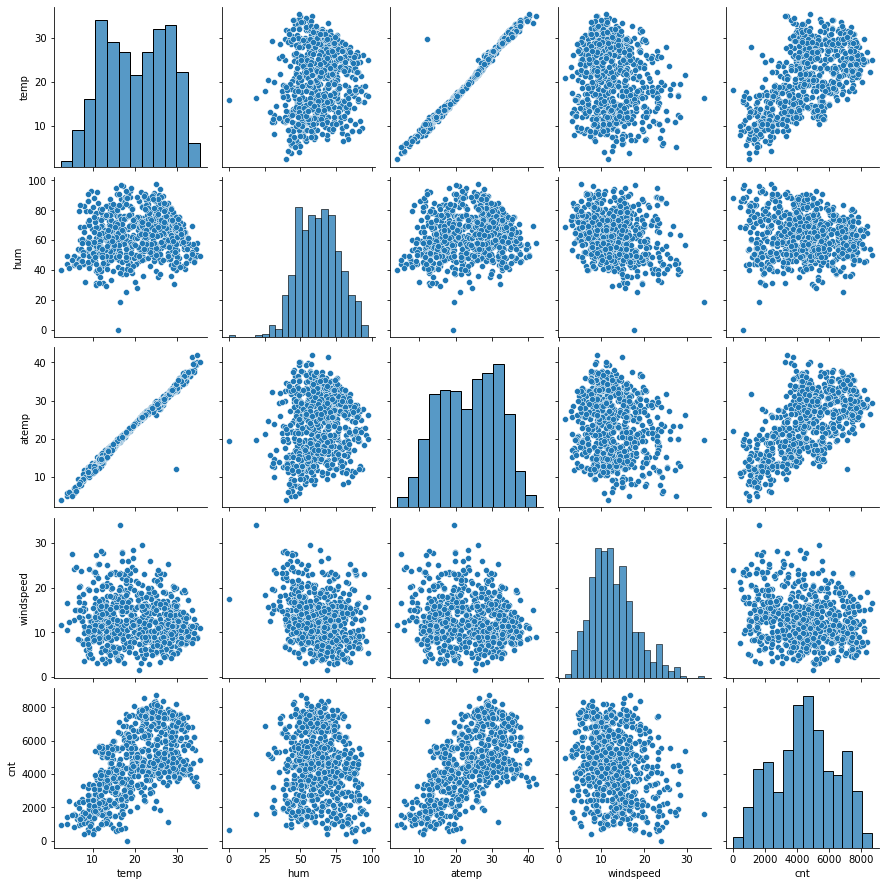

In [28]:
# Pairplot of numerical variables

sns.pairplot(dfb, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

### Insights:
- There is linear relationship between temp and atemp.
- There is some positive linear trend between temp-cnt and atemp-cnt 

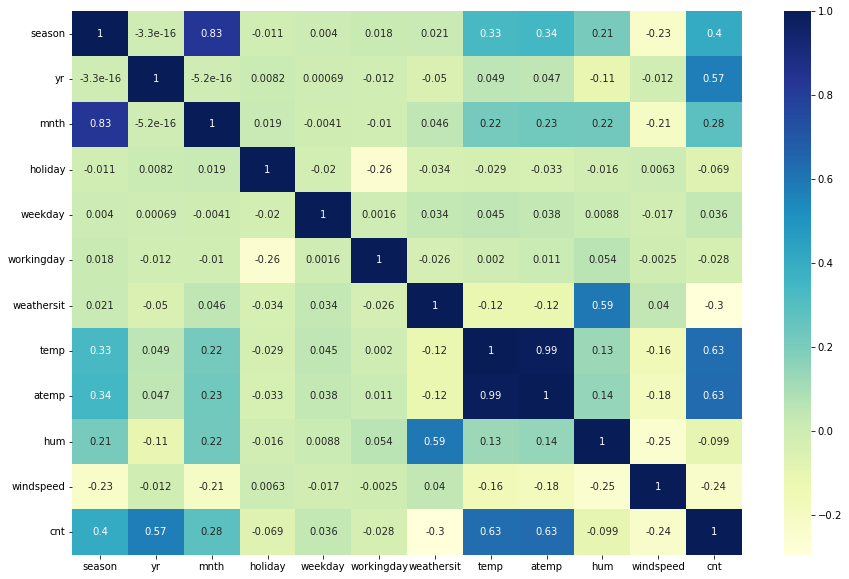

In [31]:
# Correlation between variables

plt.figure(figsize = (15, 10))
sns.heatmap(dfb.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:
- There is a correlation of 0.63 between cnt-temp and cnt-atemp
- There is a correlation of 0.99 between temp and atemp

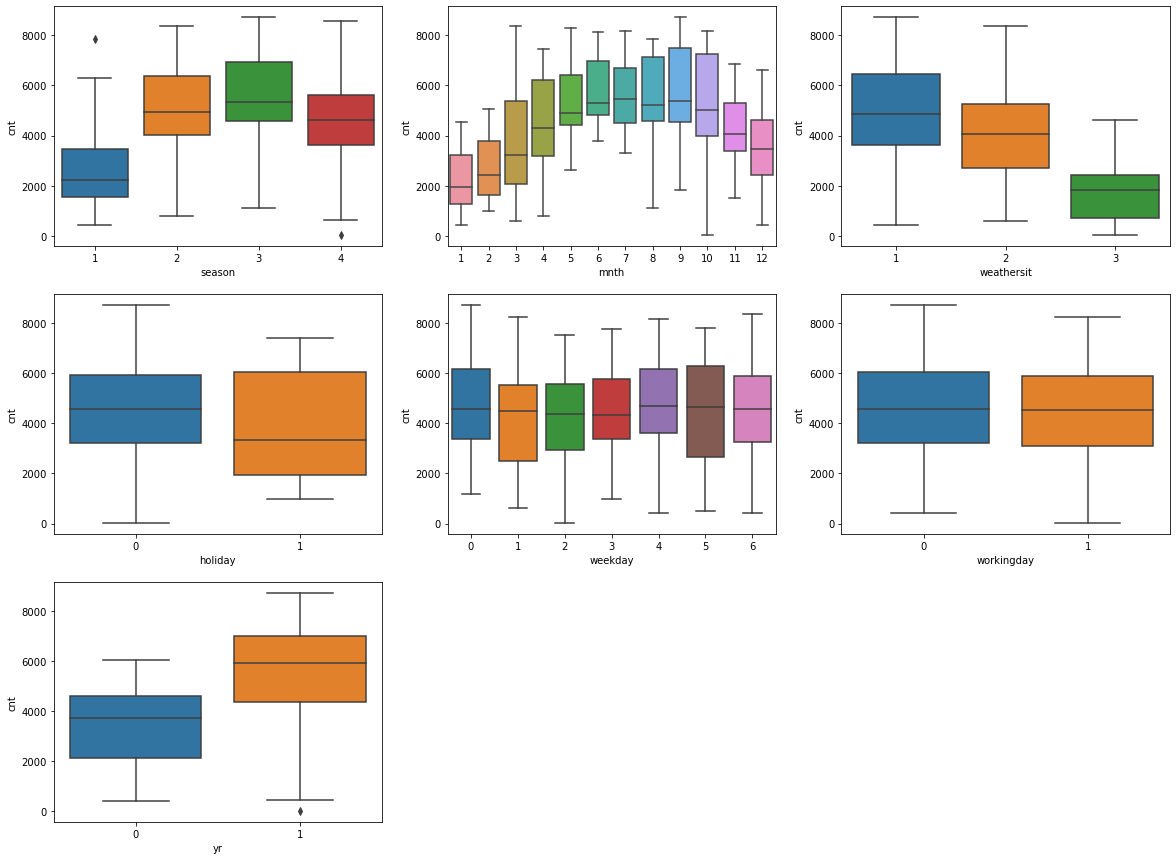

In [35]:
# Boxplot of categorical variables
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = dfb)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = dfb)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = dfb)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = dfb)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = dfb)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = dfb)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = dfb)
plt.show()

### Insights:

- season: Most of the bike booking were happening in season 2 and season 3 with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

- mnth: Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- weathersit: Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking followed by weathersit2 with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

- weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

- workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

- yr: 2019 is clearly a better year the bike booking. This indicates it could be useful.

## Creating dummy variables

In [36]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type

dfb['season']=dfb['season'].astype('category')
dfb['weathersit']=dfb['weathersit'].astype('category')
dfb['mnth']=dfb['mnth'].astype('category')
dfb['weekday']=dfb['weekday'].astype('category')

In [37]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [38]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

dfb=pd.get_dummies(data=dfb,drop_first=True)

dfb.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [39]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [40]:
dfb.shape

(730, 30)

## Splitting the data
- Train:Test in 70:30 ratio

In [41]:
# Using sklearn package for data split
from sklearn.model_selection import train_test_split

# We need to specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train,df_test=train_test_split(dfb,train_size=0.7,test_size=0.3,random_state=1000)

In [42]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [43]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [45]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
320,0,0,0,14.008347,16.16105,57.5833,20.459254,3053,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
189,0,0,1,30.066653,33.20790,60.9167,11.250104,5336,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

## Rescaling the Features

In [47]:
# importing MinMaxScaler for rescalling 

from sklearn.preprocessing import MinMaxScaler

In [48]:
scaler = MinMaxScaler()

In [49]:
# Apply scaler() to all numeric variables except the 'dummy' variables
numv=['atemp', 'hum','temp','windspeed','cnt']

df_train[numv]=scaler.fit_transform(df_train[numv])

In [50]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,0.964059,0.926848,0.503649,0.294854,0.625978,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0.651634,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,0.367234,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
176,0,0,1,0.762572,0.726076,0.528982,0.148724,0.607800,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0.861367,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [32]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,0.233333,0.076471,0.084314,0.084314,0.094118,0.094118,0.082353,0.082353,0.068627,0.088235,0.076471,0.080392,0.143137,0.145098,0.141176,0.131373,0.143137,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,0.423368,0.266010,0.278131,0.278131,0.292279,0.292279,0.275172,0.275172,0.253068,0.283915,0.266010,0.272166,0.350557,0.352545,0.348545,0.338139,0.350557,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


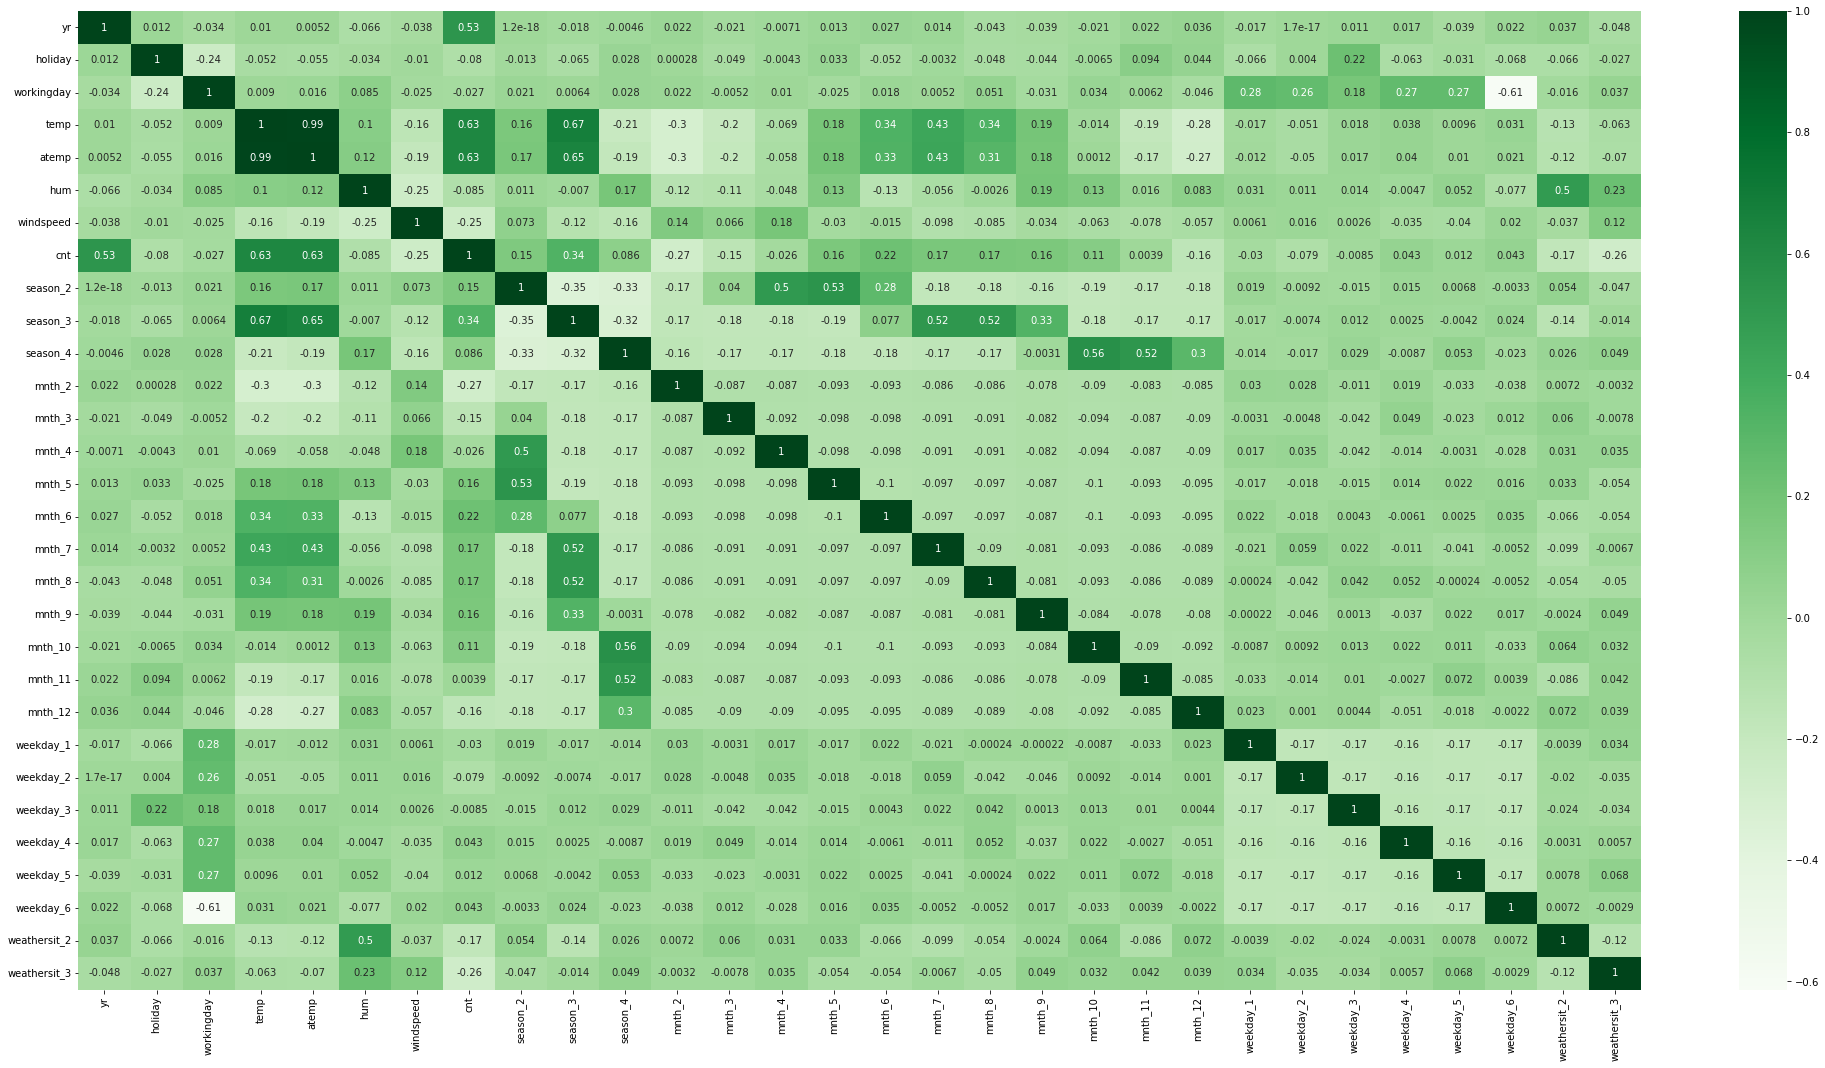

In [51]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="Greens")
plt.show()

## Dividing into X and Y sets for the model building

In [52]:
y_train = df_train.pop('cnt')
X_train = df_train

In [53]:
X_train.shape

(510, 29)

In [54]:
y_train.shape

(510,)

### We will be using RFE and statsmodel method combined for optimum final model 

In [55]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [56]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [57]:
rfe=RFE(lm,15)
rfe=rfe.fit(X_train,y_train)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 10),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 9),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 6),
 ('mnth_4', False, 7),
 ('mnth_5', False, 5),
 ('mnth_6', False, 8),
 ('mnth_7', False, 15),
 ('mnth_8', False, 4),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 13),
 ('mnth_12', False, 11),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 14),
 ('weathersit_2', False, 2),
 ('weathersit_3', True, 1)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

In [60]:
X_train.columns[~rfe.support_]


Index(['holiday', 'atemp', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12', 'weekday_6',
       'weathersit_2'],
      dtype='object')

In [61]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [62]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weathersit_3'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

### Model 1

In [63]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,18.32
3,hum,11.33
9,weekday_1,8.78
13,weekday_5,8.57
10,weekday_2,8.50
12,weekday_4,8.16
11,weekday_3,7.16
6,season_3,6.64
4,windspeed,4.26


In [64]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)


In [65]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [66]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     154.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.15e-175
Time:                        12:38:59   Log-Likelihood:                 492.86
No. Observations:                 510   AIC:                            -953.7
Df Residuals:                     494   BIC:                            -886.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2999      0.028     10.810   

- Decided to drop 'hum' due to high VIF.
- Keeping 'temp' as temperature could be an important factor for a business like bike rentals. We will check this further

### Model 2

In [67]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.13
2,temp,14.59
8,weekday_1,8.69
12,weekday_5,8.49
9,weekday_2,8.39
11,weekday_4,8.10
10,weekday_3,7.09
5,season_3,6.46
4,season_2,3.71
3,windspeed,3.66


In [69]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          7.24e-162
Time:                        12:40:10   Log-Likelihood:                 457.28
No. Observations:                 510   AIC:                            -884.6
Df Residuals:                     495   BIC:                            -821.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1194      0.019      6.143   

- Decided to drop 'season_3' due to high VIF.

### Model 3

In [70]:
X_train_rfe3=X_train_rfe2.drop(['season_3'],axis=1)

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.83
7,weekday_1,8.61
11,weekday_5,8.42
8,weekday_2,8.34
10,weekday_4,8.02
9,weekday_3,7.04
2,temp,4.02
3,windspeed,3.50
0,yr,1.88
4,season_2,1.60


In [72]:
# Adding a constant
X_train_lm3=sm.add_constant(X_train_rfe3)

# Running the linear model
lr3=sm.OLS(y_train,X_train_lm3).fit()

# Summary
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.05e-160
Time:                        12:40:31   Log-Likelihood:                 451.90
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.019      5.686   

- Need to drop workingday due to high VIF

### Model 4

In [73]:
X_train_rfe4=X_train_rfe3.drop(['workingday'],axis=1)

In [74]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.88
1,temp,4.02
2,windspeed,3.50
3,season_2,1.60
4,season_4,1.35
5,mnth_9,1.17
6,weekday_1,1.39
7,weekday_2,1.38
8,weekday_3,1.40
9,weekday_4,1.37


In [58]:
# adding constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# fiiting and running the model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     156.3
Date:                Fri, 02 Jul 2021   Prob (F-statistic):          5.06e-160
Time:                        18:20:18   Log-Likelihood:                 447.64
No. Observations:                 510   AIC:                            -869.3
Df Residuals:                     497   BIC:                            -814.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1078      0.020      5.516   

- Need to drop 'weekday_1' due to high p-value

### Model 5

In [75]:
X_train_rfe5=X_train_rfe4.drop(['weekday_1'],axis=1)

In [76]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.85
2,windspeed,3.35
3,season_2,1.60
4,season_4,1.34
5,mnth_9,1.17
6,weekday_2,1.28
7,weekday_3,1.29
8,weekday_4,1.27
9,weekday_5,1.29


In [61]:
# adding constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# fitting and running model
lr5=sm.OLS(y_train,X_train_lm5).fit()

# summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     170.4
Date:                Fri, 02 Jul 2021   Prob (F-statistic):          6.33e-161
Time:                        18:20:59   Log-Likelihood:                 447.11
No. Observations:                 510   AIC:                            -870.2
Df Residuals:                     498   BIC:                            -819.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1026      0.019      5.440   

- Dropping weekday_4 due to high p-value

### Model 6

In [77]:
X_train_rfe6=X_train_rfe5.drop(['weekday_4'],axis=1)

In [78]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.70
2,windspeed,3.31
3,season_2,1.60
4,season_4,1.33
5,mnth_9,1.17
6,weekday_2,1.22
7,weekday_3,1.23
8,weekday_5,1.23
9,weathersit_3,1.06


In [64]:
# adding constant
X_train_lm6=sm.add_constant(X_train_rfe6)

# fitting and running model
lr6=sm.OLS(y_train,X_train_lm6).fit()

# summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     187.8
Date:                Fri, 02 Jul 2021   Prob (F-statistic):          4.52e-162
Time:                        18:22:16   Log-Likelihood:                 447.10
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     499   BIC:                            -825.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1023      0.019      5.513   

- Dropping feature 'weekday_5' due to high p-value

### Model 7

In [79]:
X_train_rfe7=X_train_rfe6.drop(['weekday_5'],axis=1)

In [80]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.62
2,windspeed,3.28
3,season_2,1.59
4,season_4,1.31
5,mnth_9,1.17
6,weekday_2,1.18
7,weekday_3,1.19
8,weathersit_3,1.06


In [81]:
# adding constant
X_train_lm7=sm.add_constant(X_train_rfe7)

# fitting and running model
lr7=sm.OLS(y_train,X_train_lm7).fit()

# summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.08e-163
Time:                        12:41:14   Log-Likelihood:                 447.09
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     500   BIC:                            -831.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1028      0.018      5.610   

- Dropping weekday_3 due to high p-value

### Model 8

In [82]:
X_train_rfe8=X_train_rfe7.drop(['weekday_3'],axis=1)

In [83]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.57
2,windspeed,3.24
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.17
6,weekday_2,1.16
7,weathersit_3,1.06


In [84]:
# adding constant
X_train_lm8=sm.add_constant(X_train_rfe8)

# fitting and running model
lr8=sm.OLS(y_train,X_train_lm8).fit()

# summary
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          2.20e-163
Time:                        12:41:24   Log-Likelihood:                 444.61
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     501   BIC:                            -833.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0989      0.018      5.404   

- Dropping weekday_2 due to high p-value

### Model 9

In [85]:
X_train_rfe9=X_train_rfe8.drop(['weekday_2'],axis=1)

In [86]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe9.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe9.values,i) for i in range(X_train_rfe9.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.86
1,temp,3.55
2,windspeed,3.17
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weathersit_3,1.06


In [87]:
# adding constant
X_train_lm9=sm.add_constant(X_train_rfe9)

# fitting and running model
lr9=sm.OLS(y_train,X_train_lm9).fit()

# summary
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     263.6
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.24e-163
Time:                        12:41:34   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     502   BIC:                            -834.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.018      5.145   

### Insights:

- The Model 9 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.786 and 0.783 respectively.
- F-static is also large, stating a good fit of model.
- We will check the test data metrics to check whether this model is significant enough or not.

## Residual Analysis of the train data

- Error terms are normally distributed with mean zero.

In [88]:
y_train_cnt = lr9.predict(X_train_lm9)

Text(0.5, 0, 'Errors')

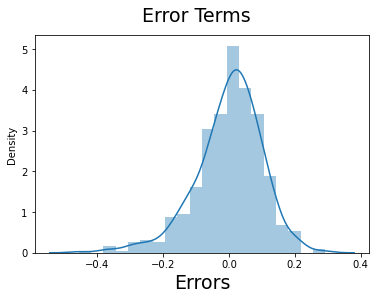

In [89]:
res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)                         # X-label

### Insights:

- From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid

## Making Predictions Using the Final Model

- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr9)

In [90]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

numv = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[numv] = scaler.transform(df_test[numv])

In [91]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.303293,0.206546,2.292490,0.071811,0.461689,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
320,0,0,0,0.244358,0.166537,1.709413,0.583358,0.348711,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
189,0,0,1,0.677164,0.342202,1.815670,0.299998,0.611367,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,0.201998,0.141823,1.287047,0.810267,0.385872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
388,1,0,1,0.245279,0.179875,2.538205,0.208991,0.496664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.707763,0.412258,0.243731,1.847594,0.344287,0.519768,0.219178,0.273973,0.269406,0.077626,0.082192,0.077626,0.063927,0.054795,0.091324,0.091324,0.114155,0.077626,0.095890,0.095890,0.146119,0.136986,0.146119,0.168950,0.141553,0.127854,0.315068,0.031963
std,0.501140,0.188034,0.455833,0.203098,0.084487,0.463782,0.157137,0.229815,0.414637,0.447017,0.444668,0.268194,0.275286,0.268194,0.245183,0.228100,0.288730,0.288730,0.318728,0.268194,0.295115,0.295115,0.354034,0.344621,0.354034,0.375566,0.349389,0.334692,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.067855,0.040740,0.684050,0.047450,0.069604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.236531,0.169462,1.487787,0.230151,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.425768,0.253718,1.797073,0.320521,0.530028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.583696,0.312116,2.159007,0.433733,0.699896,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.805164,0.414403,2.973853,0.864144,0.959503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [94]:
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [95]:
#Selecting the variables that were part of final model.
col_1=X_train_rfe9.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)
X_test_lm9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [96]:
# Making predictions using the final model (lr9)

y_pred = lr9.predict(X_test_lm9)

## Model Evaluation

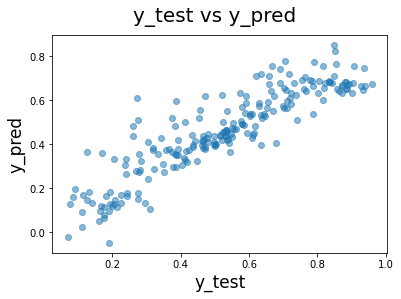

In [97]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()

### R-Squared value Test

In [98]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7193291218131405

### Adjusted R-Squared value Test

In [99]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7100177656647613

### Final model equation

cnt = 0.0936 + (yr × 0.2266) + (temp × 0.5596) − (windspeed × 0.1044) + (season_2 × 0.0757) + (season_4 × 0.1386) + (mnth_9 × 0.0873) - (weathersit_3 × 0.2678)

### All predictor variables:

- yr

- temp

- windspeed

- season_2

- season_4

- mnth_9

- weathersit_3

#### NOTE:
- yr : year
- temp : temperature
- mnth_9 : september
- weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- season_2: spring
- season_4: winter







### Top 3 most important predictor variables: 

- Temperature (temp) - A coefficient value of ‘0.0936’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.0936 units.

- Year (yr) - A coefficient value of ‘0.2266’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2266 units.

- Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2678’ indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 0.2678 units.

### Other important predictor variables to watchout for:

- season_4: - A coefficient value of ‘0.1386’ indicated a unit increase in season_4 variable increases the bike hire numbers by 0.1386 units.

- windspeed: - A coefficient value of ‘-0.1044’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1044 units.